In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
M = 10**6
G = 10**9
T = 10**12
seconds_in_year = 31536000
hours_in_year = 8760
kWh_to_J = 3600*10**3
W_to_Wh = hours_in_year

In [27]:
FIG_PATH = '../../images/'
DATA_PATH = 'data/'
BTC_PATH = DATA_PATH + 'bitcoin/'


# Values

## Bitcoin Mining and its Energy Footprint (2014)

In [3]:
# Mid march
BMEF_date = datetime.datetime(2014, 3, 15)
BMEF = {'lower': 0.1*G/T*W_to_Wh, 'estimate': 3*G/T*W_to_Wh, 'upper': 10*G/T*W_to_Wh}

## Bitcoin Miners True Energy Consumption (2017)

In [4]:
BMTEC_date = datetime.datetime(2017, 6, 15)
BMTEC_estimate = 33.56

## Quantification of energy and carbon costs for mining cryptocurrencies (2018)

In [5]:
QECCMC_date = [datetime.datetime(2016, 6, 15), datetime.datetime(2017, 6, 15)]
QECCMC_estimate = [283*M/T*W_to_Wh,948*M/T*W_to_Wh]

## The Bitcoin Mining Network

In [6]:
BMN_date = datetime.datetime(2018,5,15)
BMN_estimate =  4*G/T*W_to_Wh

## BECI

In [7]:
BECI = pd.read_csv('data/BECI_TWh.csv')
BECI['Date'] = pd.to_datetime(BECI['Date'])
BECI = BECI.set_index('Date')
BECI_avg = BECI.groupby(pd.Grouper(freq='M')).mean()
BECI_avg = BECI_avg.rename(columns={'Estimated TWh per Year': 'estimation', 'Minimum TWh per Year': 'lower'})
BECI_avg = BECI_avg

## CBECI

In [8]:
CBECI = pd.read_csv('data/CBECI.csv')
CBECI = CBECI.rename(columns={'Date and Time': 'Date', 'MAX': 'upper', 'MIN': 'lower', 'GUESS': 'estimation'})
CBECI['Date'] = pd.to_datetime(CBECI['Date'])
CBECI = CBECI.set_index('Date')
CBECI = CBECI.drop(columns=['Timestamp'])
CBECI_avg = CBECI.groupby(pd.Grouper(freq='M')).mean()
CBECI_avg = CBECI_avg

## Mark Bevand

In [9]:
dates = [datetime.datetime(2017, 2, 26), datetime.datetime(2017,7,28), datetime.datetime(2018,1,11)]
MB = pd.DataFrame({'lower': [2.85, 5.61, 14.19], 'estimate': [4.43, 7.6, 18.4], 'upper': [6.78,10.93,27.47]}, index=dates)
MB = MB

## Bitcoin price

In [35]:
price = pd.read_csv(BTC_PATH+'price.csv')
price['Timestamp'] = pd.to_datetime(price['Timestamp'])
price = price.rename(columns={'Timestamp': 'timestamp', 'market-price': 'price'}).set_index('timestamp')
price = price.groupby(pd.Grouper(freq='W')).mean()

In [36]:
price = price[price.index > BMEF_date]

# Plot

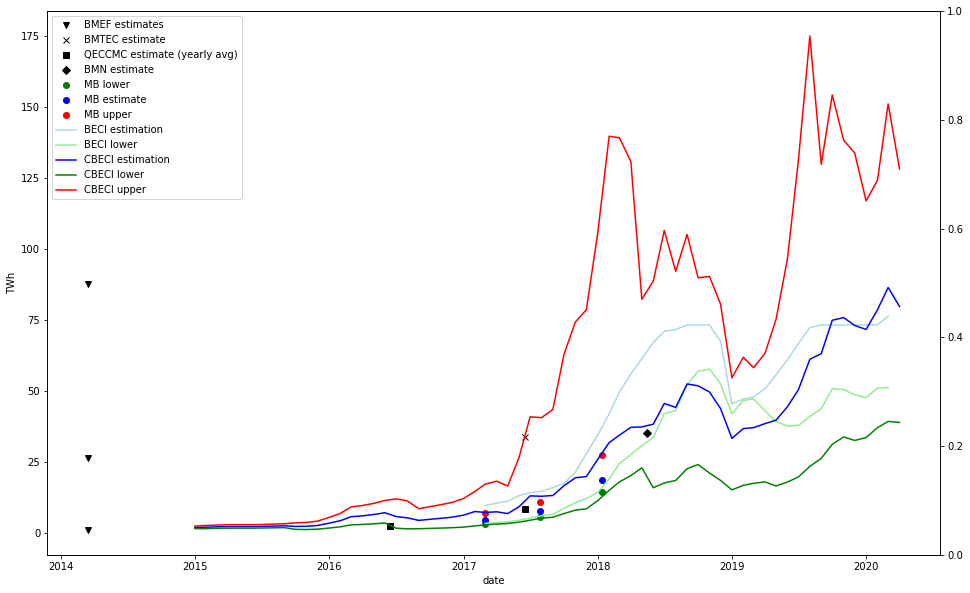

In [43]:
fig, ax = plt.subplots(figsize=(16,10))

# BMEF
ax.plot(BMEF_date, BMEF['lower'], 'v', color='black', label='BMEF estimates')
ax.plot(BMEF_date, BMEF['estimate'], 'v', color='black')
ax.plot(BMEF_date, BMEF['upper'], 'v', color='black')


# BMTEC
ax.plot(BMTEC_date,BMTEC_estimate, 'x', color='black', label = 'BMTEC estimate')

# QECCMC
ax.plot(QECCMC_date,QECCMC_estimate, 's',color='black',label='QECCMC estimate (yearly avg)')

# BMN
ax.plot(BMN_date,BMN_estimate, 'D',color='black',label='BMN estimate')

# Mark Bevand
ax.plot(MB['lower'],'go', label='MB lower')
ax.plot(MB['estimate'],'bo', label='MB estimate')
ax.plot(MB['upper'],'ro', label='MB upper')

# BECI
ax.plot(BECI_avg['estimation'], color = 'lightblue', label='BECI estimation')
ax.plot(BECI_avg['lower'], color = 'lightgreen', label='BECI lower')

# CBECI
ax.plot(CBECI_avg['estimation'], color='blue',label='CBECI estimation')
ax.plot(CBECI_avg['lower'], color='green',label='CBECI lower')
ax.plot(CBECI_avg['upper'], color='red',label='CBECI upper')

ax2 = ax.twinx()

# Bitcoin price
#ax2.plot(price, 'g-',color = 'lightgrey')

# Options
ax.legend()
ax.set_ylabel('TWh')
ax.set_xlabel('date')
plt.savefig(FIG_PATH+'literature_studies.png')
plt.show()

In [11]:
x = datetime.datetime(2020, 1, 1)
y = 100